In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle/

In [3]:
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          34641        952  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           4757        136  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           6785        144  1.0              
mohithsairamreddy/salary-data 

In [6]:
! kaggle datasets download -d paultimothymooney/kermany2018

100% 10.8G/10.8G [04:01<00:00, 133MB/s]
100% 10.8G/10.8G [04:01<00:00, 48.1MB/s]


In [7]:
! unzip /content/kermany2018.zip -d retinal_disease_classification_dataset

Streaming output truncated to the last 5000 lines.
  inflating: retinal_disease_classification_dataset/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: retinal_disease_classification_dataset/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: retinal_disease_classification_dataset/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: retinal_disease_classification_dataset/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: retinal_disease_classification_dataset/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: retinal_disease_classification_dataset/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: retinal_disease_classification_dataset/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: retinal_disease_classification_dataset/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: 

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the path to your dataset
train_dir = '/content/retinal_disease_classification_dataset/OCT2017 /train'
validation_dir = '/content/retinal_disease_classification_dataset/OCT2017 /validation'
test_dir = '/content/retinal_disease_classification_dataset/OCT2017 /test'

# Define the image dimensions and other parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10
num_classes = 4

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data normalization for validation and testing
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and augment the training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the validation data without augmentation
validation_data = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the testing data without augmentation
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 83484 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [23]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [24]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.90:
            print("\nReached 90% accuracy. Stopping training.")
            self.model.stop_training = True

In [26]:
callback = Callback()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(
    train_data,
    steps_per_epoch=150,
    epochs=25,
    validation_data=validation_data,
    validation_steps=10,
    callbacks=[callback]
)

Epoch 1/25
150/150 [==============================] - 391s 3s/step - loss: 1.0084 - accuracy: 0.6119
Epoch 2/25
150/150 [==============================] - 400s 3s/step - loss: 0.7747 - accuracy: 0.7169
Epoch 3/25
150/150 [==============================] - 398s 3s/step - loss: 0.7146 - accuracy: 0.7356
Epoch 4/25
150/150 [==============================] - 391s 3s/step - loss: 0.6920 - accuracy: 0.7473
Epoch 5/25
150/150 [==============================] - 401s 3s/step - loss: 0.6368 - accuracy: 0.7602
Epoch 6/25
150/150 [==============================] - 396s 3s/step - loss: 0.6084 - accuracy: 0.7727
Epoch 7/25
150/150 [==============================] - 393s 3s/step - loss: 0.6030 - accuracy: 0.7765
Epoch 8/25
150/150 [==============================] - 387s 3s/step - loss: 0.5764 - accuracy: 0.7921
Epoch 9/25
150/150 [==============================] - 389s 3s/step - loss: 0.5785 - accuracy: 0.7838
Epoch 10/25
150/150 [==============================] - 383s 3s/step - loss: 0.5697 - accura

In [27]:
# Function to preprocess the uploaded image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((img_width, img_height))
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to predict the retinal disease
def predict_retinal_disease(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)[0]
    disease_class = np.argmax(prediction)
    return prediction, disease_class

Saving i.jpg to i (1).jpg
1/1 [==============================] - 0s 38ms/step


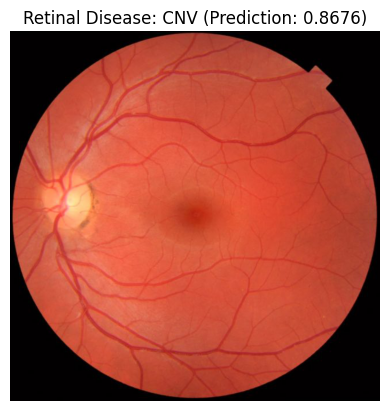

In [31]:
# Run this code cell to upload an image and make a prediction
from google.colab import files
uploaded = files.upload()

# Get the uploaded image path
uploaded_image_path = list(uploaded.keys())[0]

# Display the uploaded image
uploaded_image = Image.open(uploaded_image_path)
plt.imshow(uploaded_image)
plt.axis('off')

# Predict the retinal disease
prediction, disease_class = predict_retinal_disease(uploaded_image_path)

# Set the title based on the prediction
class_names = train_data.class_indices
disease_status = list(class_names.keys())[disease_class]
plt.title(f'Retinal Disease: {disease_status} (Prediction: {prediction[disease_class]:.4f})')
plt.show()